## Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Input, Model, backend as K
import numpy as np
import matplotlib.pyplot as plt
print("Tensorflow version: ", tf.__version__)
from IPython.display import display

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K

# Enable the TPU
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)




Tensorflow version:  2.12.0


## MNIST Examples from keras

In [8]:
batch_size = 128
num_classes = 10 # 0,1,...., 9. The digits
epochs = 20 # Number of runs

Batch size defines the number of samples that will be propagated through the network. If you have 1050 training samples
then our algorithm will take in the training samples in batches, where each batch has the same size. However, it must
be the case that the number of samples is divisible by the batch_size, else we have batches with fractional instances,
these do not exist.

In addition, there are some advantages of using a batch size that is smaller than the total number of training samples:
* We require less memory to be used. By training with fewer sampling, the overall training prodedure takes less memory.
* Typically, networks train faster with mini-batches as opposed to the entire batch of all instances. This is a consequence of how weights are adjusted after each propagation.

Disadvantages:
* The smaller the batches, the less accurate the estimate of the gradient will be.

In [9]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [11]:
# Model initialization and fitting
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) # input layer
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) # layer 1
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax') ) # final layer, output

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'], steps_per_execution=128)

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [============================

In [ ]:

# Change epoch (default)
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Create CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## MNIST Fashion - Exercise 1.2

In [6]:
# Load in data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [84]:
# y_train_full.shape
X_train_full.shape

(60000, 28, 28)

In [16]:
# X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
# y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [17]:
# For the fashion list we have different labels than the MNIST digits:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#### Example of an instance

Dress


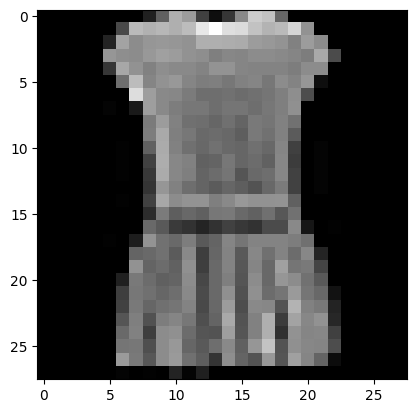

In [59]:
# Example of instance 4
print(class_names[y_train_full[3]])
plt.imshow(X_train_full[3,:,:], cmap='gray')
plt.show()



## Back to the exercise:
##### Build the neural network!

In [45]:
# Build the network layer by layer, in a SEQUENCE -> sequential
model = keras.models.Sequential()

""" Add the first layer, the input layer.

It converts each input image into a 1D array: if it receives input data X, it
computes X.reshape(-1, 1). This layer does not have any parameters; it is just
there to do some simple preprocessing. Since it is the first layer in the model, you
should specify the input_shape, which doesn’t include the batch size, only the
shape of the instances. """

model.add(keras.layers.Flatten(input_shape=[28, 28], name="InputLayer"))

# Add layer with 300 neurons. Each Dense layer manages its own weight matrix, containing all the
# connection weights between the neurons and their inputs.

model.add(keras.layers.Dense(300, activation="relu", name="HiddenLayer1"))

# And another layer, with 100 neurons
model.add(keras.layers.Dense(100, activation="relu", name="HiddenLayer2"))

# The final layer, the output layer, we have 10 classes, so we need 10 neurons, 1 per class.
# We use softmax as all classes are exclusive.

""" The network is configured to output N values, one for each class in the classification
task, and the softmax function is used to normalize the outputs, converting them from
weighted sum values into probabilities that sum to one. Each value in the output of the
softmax function is interpreted as the probability of membership for each class."""

model.add(keras.layers.Dense(10, activation="softmax", name="OutputLayer"))

#### Model in one sequence:

In [ ]:
# it is also possible to do it in one go:
"""
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
        ])
"""

#### Visualize our model:

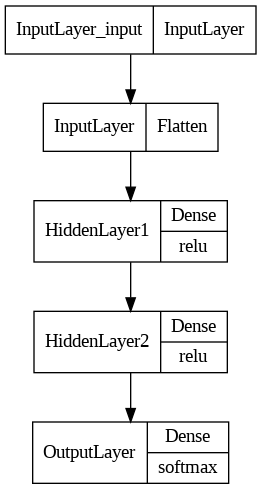

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [123]:
# Image of our model - useful if we have named layers

display(keras.utils.plot_model(model, show_layer_activations=True))

# Or summary
model.summary()



The output shape can have None. This implies that the batch size can be anything.

### Run the NN:

In [82]:
""" We have sparse labels (i.e., for each instance, there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive.

Regarding the optimizer, "sgd" means that we will train the model using
simple Stochastic Gradient Descent.

As we are using a TPU, we can adjust the steps_per_execution. This
makes the running and calculating of the weights from our NN sufficiently
faster.
"""

# Choose an optimizer from keras.optimizers.X
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=[["accuracy"], ["mse"]], steps_per_execution=100)

# Training and evaluation - epochs is the number of runs
history = model.fit(X_train_full / 255.0, y_train_full, epochs=30,
                    validation_split=0.1, batch_size=64, verbose=0) # verbose=0 is stfu

#### Plot the curves of loss, accuracy, validation loss and validation accuracy:

In [71]:
import pandas as pd

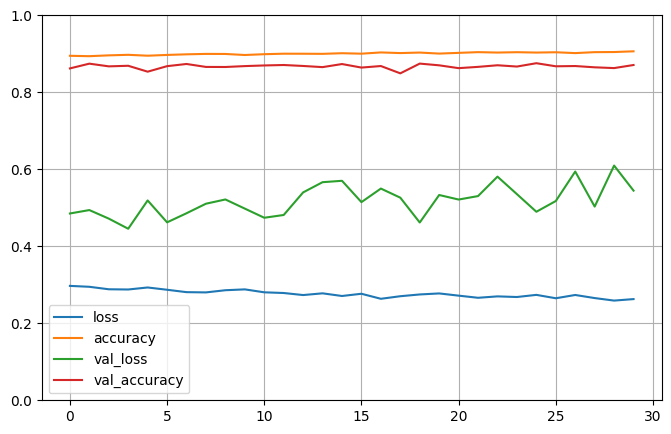

'the validation curves are close to the training curves, which means\nthat there is not too much overfitting '

In [72]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

"""the validation curves are close to the training curves, which means
that there is not too much overfitting """

## Evaluate the model:

In [75]:
y_test.shape

(10000,)

In [83]:
model.evaluate(X_test, y_test, batch_size=64, verbose=1)

157/157 [==============================] - 0s 3ms/step - loss: 354.4655 - accuracy: 0.8326 - mse: 27.6995


[354.46551513671875, 0.8325999975204468, 27.69953727722168]

# Experiment with the network:

In [3]:
def make_model(arch, optimizer,
               metrics: list = ["accuracy"],
               steps_per_execution: int = 1,
               summary_model: bool = False):

  # Initiate model
  model = keras.models.Sequential()
  # Add input layer
  model.add(keras.layers.Flatten(input_shape=arch["input shape"]))

  # Add layers
  for i, j in enumerate(arch['neurons']):
    model.add(keras.layers.Dense(j, activation=arch['activation'][i]))

  # Print summary if wanted
  if summary_model:
    model.summary()

  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=metrics,
                steps_per_execution=steps_per_execution)

  # Return model before fitting
  return model


def fit_model(model, X_train, y_train, scaling,
              epochs: int = 30, validation_split: float = 0.1,
              batch: int = 64, verbose: int = 0):

  history = model.fit(X_train/scaling, y_train, epochs=epochs,
                    validation_split = validation_split, batch_size=batch, verbose=verbose) # verbose=0 is stfu

  return history


def eval_model(model, X_test, y_test, batch, verbose=1):
  return model.evaluate(X_test, y_test, batch_size=batch, verbose=verbose)



In [4]:
mlp_arch ={
    "input shape" : [28, 28],
    "neurons": [300, 100, 10],
    "activation": ['relu', 'relu', 'softmax'],
}

In [7]:
model1 = make_model(mlp_arch, optimizer=keras.optimizers.Adam(learning_rate=0.001),
           steps_per_execution=100, summary_model=False)

trainedmodel1 = fit_model(model1, X_train_full, y_train_full, 255.0,
                          verbose=1)

Epoch 1/30
844/844 [==============================] - 4s 5ms/step - loss: 0.4951 - accuracy: 0.8230 - val_loss: 0.4152 - val_accuracy: 0.8485
Epoch 2/30
844/844 [==============================] - 1s 2ms/step - loss: 0.3638 - accuracy: 0.8660 - val_loss: 0.3601 - val_accuracy: 0.8677
Epoch 3/30
844/844 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.8800 - val_loss: 0.3631 - val_accuracy: 0.8660
Epoch 4/30
844/844 [==============================] - 1s 2ms/step - loss: 0.3015 - accuracy: 0.8883 - val_loss: 0.3229 - val_accuracy: 0.8820
Epoch 5/30
844/844 [==============================] - 1s 1ms/step - loss: 0.2833 - accuracy: 0.8945 - val_loss: 0.3416 - val_accuracy: 0.8753
Epoch 6/30
844/844 [==============================] - ETA: 0s - loss: 0.2733 - accuracy: 0.8991

KeyboardInterrupt: ignored

In [104]:
eval_model(model1, X_test, y_test, batch=64, verbose=0)

157/157 [==============================] - 0s 3ms/step - loss: 90.8150 - accuracy: 0.8707


[90.81500244140625, 0.8707000017166138]

In [62]:
optimizers = [
     # Keyword arguments (kwargs) come in dictionaries ('{}')
      (keras.optimizers.Adam, {'learning_rate': 0.001}),
      # (keras.optimizers.Adam, {learning_rate=0.002}), (keras.optimizers.Adam, {learning_rate=0.003}),
      # (keras.optimizers.Adam, {learning_rate=0.004}), (keras.optimizers.Adam, {learning_rate=0.005}),




      # (keras.optimizers.Adadelta, {}),
      (keras.optimizers.Adagrad, {}),
      (keras.optimizers.Adamax, {'learning_rate': 0.001}), (keras.optimizers.Adamax,  {'learning_rate': 0.002}), (keras.optimizers.Adamax,  {'learning_rate': 0.003}),
      # (keras.optimizers.Ftrl,{}),
      (keras.optimizers.Nadam,{}),
      (keras.optimizers.RMSprop, {}),
      # (keras.optimizers.SGD, {})

      ]

accuracies = np.empty((0, 4))
for optimizer, kwarg in optimizers:
  # print(optimizer.__name__, kwarg)
  model1 = make_model(mlp_arch, optimizer=optimizer(**kwarg),
           steps_per_execution=100, summary_model=False)

  fit_model(model1, X_train_full, y_train_full, 255.0,
                          verbose=0)

  accuracies = np.append(accuracies, np.array([f"Name: {optimizer.__name__}",
                                               f"Kwargs: {kwarg}", "Accuracy:", eval_model(model1, X_test, y_test, batch=64, verbose=0)[1]]).reshape(1, -1), axis=0)






In [63]:
print(accuracies[:,-1])
best = np.argmax(np.array([float(i) for i in accuracies[:,-1]]))
print("Best model:", accuracies[:,0][best], accuracies[:,1][best], accuracies[:,2][best], accuracies[:,-1][best])


# if we have different models:
#display(keras.utils.plot_model(model, show_layer_activations=True))

['0.8705999851226807' '0.824400007724762' '0.883899986743927'
 '0.8658000230789185' '0.8716999888420105' '0.8619999885559082'
 '0.8712999820709229']
Best model: Name: Adamax Kwargs: {'learning_rate': 0.001} Accuracy: 0.883899986743927


In [99]:
def test_networks(models, optimizers, batch_sizes, epochs):

  results = np.empty((0,5))

  for model in models:
    for optimizer, kwarg in optimizers:
      model1 = make_model(model, optimizer=optimizer(**kwarg),
           steps_per_execution=100, summary_model=False)

      for batch in batch_sizes:
        for epoch in epochs:
          fit_model(model1, X_train_full, y_train_full, 255.0,
                            verbose=0, batch=batch, validation_split=0.1)

          accuracy = eval_model(model1, X_test, y_test, batch=batch, verbose=0)[1]

          results = np.append(results, np.array([f"{optimizer.__name__ = }", f"{kwarg = }",
                                                      f"{batch = }",f"{epoch = }", f"{accuracy = }"]).reshape(1, -1), axis=0)


    return results



results1 = test_networks(
      [mlp_arch],
       [
     # Keyword arguments (kwargs) come in dictionaries ('{}')
      (keras.optimizers.Adam, {'learning_rate': 0.001}),
      # (keras.optimizers.Adam, {learning_rate=0.002}), (keras.optimizers.Adam, {learning_rate=0.003}),
      # (keras.optimizers.Adam, {learning_rate=0.004}), (keras.optimizers.Adam, {learning_rate=0.005}),




      # (keras.optimizers.Adadelta, {}),
      # (keras.optimizers.Adagrad, {}),
      (keras.optimizers.Adamax, {'learning_rate': 0.001}), (keras.optimizers.Adamax,  {'learning_rate': 0.002}), (keras.optimizers.Adamax,  {'learning_rate': 0.003}),
      # (keras.optimizers.Ftrl,{}),
      # (keras.optimizers.Nadam,{}),
      # (keras.optimizers.RMSprop, {}),
      # (keras.optimizers.SGD, {})

      ],

      batch_sizes=[32, 64, 128, 256], epochs = [5, 10, 20, 30]

)

In [100]:
# Find the best model:

accuracies = [float(i.split('=')[1].strip()) for i in results1[:,-1]]
best = np.argmax(np.array([accuracies]))

print("Best model:", "\n")
for i in np.arange(results1.shape[-1]):
  print(results1[:,i][best])


Best model: 

optimizer.__name__ = 'Adam'
kwarg = {'learning_rate': 0.001}
batch = 128
epoch = 10
accuracy = 0.881600022315979


In [117]:
top5 = [np.argsort(accuracies)[-5:][::-1]][0] # [::-1] is for reverse order, such that the highest accuracy is value 1 in the top5
top5
for val in top5:
  print(accuracies[val])
# accuracies[top5]

0.881600022315979
0.8805000185966492
0.8795999884605408
0.8791000247001648
0.8781999945640564
